In questa esperienza quello che abbiamo fatto è studiare il circuito CR(filtro passa alto) e il circuito RC(passa basso), studiandone in particolare
l'ampiezza e lo sfasamento rispetto al valore di v0 in entrata generato dal generatore d'onde, per stimare la frequenza di taglio e vedere che essa
sia consistente col valore teorico.

Per i filtri RC e RL È noto che la frequenza di taglio è data da: 1/(2piRC), nel caso considerato (approx 10.33 kHz)

![image](screen1.png)
![image](screen2.png)

In [8]:
AO = 48.8   # Ampiezza iniziale
FO = 10334 # Frequenza di taglio

Intersezioni trovate: [1.1243748102660431, 1.1292170823813945, 1.1340593544967457, 1.138901626612097, 1.1437438987274482]
Differenze nelle intersezioni: [0.008982373240199126, 0.004798125553212684, 0.0006385570110142291, 0.003496291376687055, 0.007606381466475631]


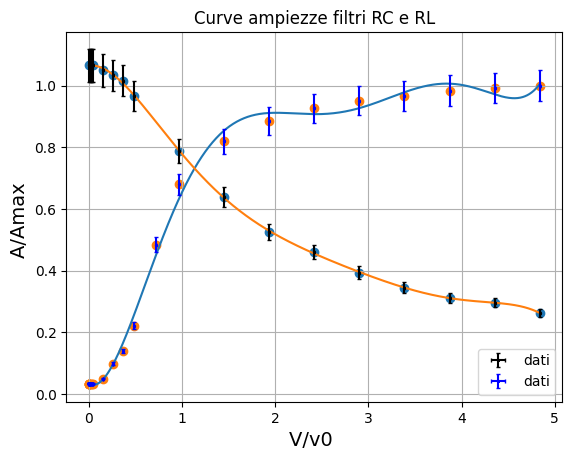

In [9]:
import Tiamat as tiam
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

ampl4 = np.array([1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 1.60, 2.40, 4.80, 6.80, 10.8, 23.6, 33.2, 40.0, 43.2, 45.2, 46.4, 47.2, 48.0, 48.4, 48.8])/AO#Volt, c.r.
freq4 = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0,50000.0])/FO
ampl3 = np.array([52.0, 52.0, 52.0, 52.0, 52.0, 51.2, 50.4, 49.6, 47.2, 38.4, 31.2, 25.6, 22.4, 19.2, 16.8, 15.2, 14.4, 12.8])/AO #r.c.
freq3 = np.array([50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])/FO
valori1, differenze1 = tiam.find_roots(freq4, ampl4, freq3, ampl3, np.min(freq4), np.max(freq4),precision=0.01)
print("Intersezioni trovate:", valori1)
print("Differenze nelle intersezioni:", differenze1)

plt.errorbar(freq3,ampl3 , xerr=0, yerr=(ampl3)/20, fmt='*', markersize=2, capsize=1.5, c='k', label='dati')
plt.errorbar(freq4,ampl4 , xerr=0, yerr=(ampl4)/20, fmt='*', markersize=2, capsize=1.5, c='b', label='dati')
plt.legend()
plt.ylabel(r'A/Amax ', size=14)
plt.xlabel(r'V/v0 ', size=14)
plt.title(r'Curve ampiezze filtri RC e RL')
plt.grid()
plt.scatter(freq3,ampl3)
plt.scatter(freq4,ampl4)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[12312.312312312313] [0.0006313689568228087]
[10610.61061061061] [0.00016164303457111284]


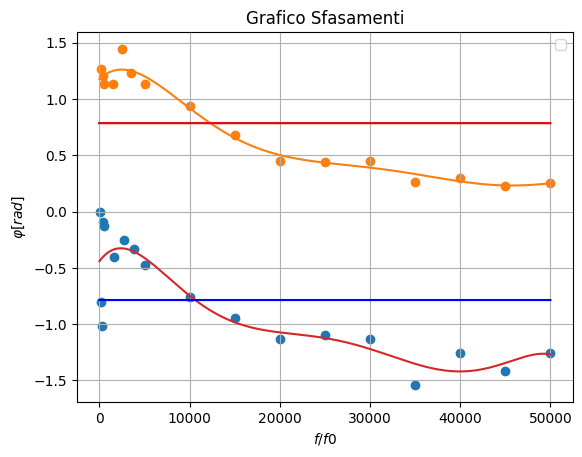

In [45]:
#Misuriamo v ai capi del condensatore
freq3 = np.array([50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])
sfas3 = np.array([0, 0.08, 0.06, 0.004, 0.004, 0.004, 0.0015, 0.0014, 0.0015, 0.0012, 0.0010, 0.0009, 0.0007, 0.0006, 0.0007, 0.0005, 0.0005, 0.0004])*(-2*np.pi*freq3)
#Caduta di potenziale ai capi della resistenza
#freq4 = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 160.0, 270.0, 380.0, 500.0, 1600.0, 2700.0, 3800.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0,50000.0])#KHz
freq4 = np.array([180.0, 370, 500.0, 1500.0, 2500.0, 3500.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0])
sfas4 = np.array([1.12, 0.52, 0.36, 0.12, 0.092, 0.056, 0.036, 0.015, 0.0072, 0.0036, 0.0028, 0.0024, 0.0012, 0.0012, 0.0008, 0.0008])*(2*np.pi*freq4)

# NON CHIEDETE!!
sfas4 = sfas4/1000
sfas3 = sfas3/100

rettax1=np.linspace(0, 50000.0,10000)
rettay1=np.ones(10000)*(np.pi)/4
rettax2=np.linspace(0, 50000.0,10000)
rettay2=np.ones(10000)*(-np.pi)/4
valori1,differenze1=tiam.find_roots(rettax1,rettay1,freq4,sfas4,0,50000,precision=0.001)
print(valori1,differenze1)
valori2,differenze2=tiam.find_roots(rettax2,rettay2,freq3,sfas3,0,50000,precision=0.001)
print(valori2,differenze2)

plt.title('Grafico Sfasamenti')
plt.xlabel(r'$f/f0$')
plt.ylabel(r'$φ [rad]$')

plt.grid()
plt.scatter(freq3,sfas3)
plt.scatter(freq4,sfas4)
plt.plot(rettax1,rettay1,color="red")
plt.plot(rettax2,rettay2,color="blue")
plt.legend()
ax = plt.gca()

# è una palla modificare il codice per scalare tutti i dati di 10000
# quindi mi limito a graficare il grafico corretto
# immaggino che possa dare problemi nel momento in cui si usano altri dati
# consiglio qundi di visualizzare prima i dati senza scale e poi ridimensionare
# a piacere, lascio comunque sulle x il label sbagliaot f/f0 
# perchè è quello il risultato desiderato

#plt.gca().set_xticks(np.linspace(0, 40000, 5))  # Ticks originali
#plt.gca().set_xticklabels(np.linspace(0, 4, 5))  # Ticks trasformati

#ax.set_ylim([-1.6, 1.5])
#ax.set_xlim([0, 40000])
plt.show()



![image](screen12.png)

Slope: -0.33881967213114755, Intercept: 1.1256830601092898
Matrice di covarianza:
[[ 0.00038266 -0.00012343]
 [-0.00012343  0.00041805]]
Slope: 0.43804543325526935, Intercept: 0.20199063231850128
Matrice di covarianza:
[[ 0.01688596 -0.00590063]
 [-0.00590063  0.02009451]]
frequenza di taglio: 1.1889997650638962
INCERTEZZA FREQUENZA DI TAGLIO:  0.22517368967036966


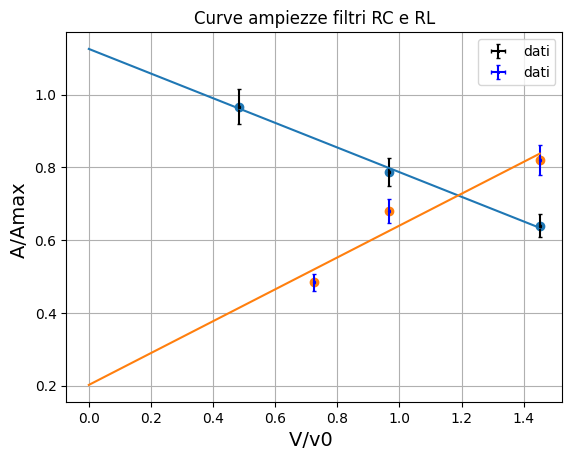

In [49]:
ampl_fit = np.array([47.2, 38.4, 31.2])/AO
freq_fit = np.array([5000.0, 10000.0, 15000.0])/FO
ampl_2fit = np.array([23.6, 33.2, 40.0])/AO
freq_2fit = np.array([7500.0, 10000.0, 15000.0])/FO


#facciamo il fit dei 2 set di dati
slope1,intercept1,cov_matrix1=tiam.fit_lineare(freq_fit,ampl_fit)
slope2,intercept2,cov_matrix2=tiam.fit_lineare(freq_2fit,ampl_2fit)

A1 = slope1
A2 = slope2
B1 = intercept1
B2 = intercept2

VT = (B2-B1)/(A1-A2)

SA1 = cov_matrix1[0][0]
SB1 = cov_matrix1[1][1]
SA2 = cov_matrix2[0][0]
SB2 = cov_matrix2[1][1]
COVA1B1 = cov_matrix1[0][1]
COVA2B2 = cov_matrix2[0][1]

SVT = np.sqrt((((B2 - B1)/((A1 - A2)**2))**2)*(SA1 + SA2) + ((1/(A1-A2))**2)*(SB1+SB2)+(2*(B2-B1)/((A1-A2)**3))*(COVA1B1 + COVA2B2))

print("frequenza di taglio:",VT)
print("INCERTEZZA FREQUENZA DI TAGLIO: ",SVT)

xfit=np.linspace(0,15000/FO,10000)
x2fit=np.linspace(0,15000/FO,10000)
plt.errorbar(freq_fit,ampl_fit , xerr=0, yerr=(ampl_fit)/20, fmt='*', markersize=2, capsize=1.5, c='k', label='dati')
plt.errorbar(freq_2fit,ampl_2fit , xerr=0, yerr=(ampl_2fit)/20, fmt='*', markersize=2, capsize=1.5, c='b', label='dati')
plt.legend()
plt.ylabel(r'A/Amax ', size=14)
plt.xlabel(r'V/v0 ', size=14)
plt.title(r'Curve ampiezze filtri RC e RL')
plt.grid()
plt.scatter(freq_fit,ampl_fit)
plt.scatter(freq_2fit,ampl_2fit)
plt.plot(xfit,slope1*xfit+intercept1)
plt.plot(x2fit,slope2*x2fit+intercept2)
plt.show()

In [12]:
#verifica consistenza (v0 teorico=10334)
#consistenza tra v0 intersezione e teorico

In [13]:
import importlib
import Tiamat# La libreria che vuoi ricaricare

# Ricarica la libreria
importlib.reload(Tiamat)
import Tiamat as tiam
v_sper=11269
v_teo=10334
err_sper=112
R=1/(2*np.pi*10000*2.2*10**(-9))
C=2.2*10**(-9)
err_teo=51
print(tiam.consistenza_statistica(v_sper,v_teo,err_sper,err_teo))

(False, 1.509903313490213e-14)
